돈을 갚을 능력이 있는 사람(Risk:0)과 돈을 갚을 능력이 없는 사람(Risk:1)인 사람의 부채 평균을 살펴보고 싶다.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
# German credit data
german_dataset = pd.read_csv('german_credit_data.csv',  index_col=0)

# 돈을 갚을 능력(target 변수)을 나타내는 변수를 가지고 있는 데이터를 로드한다.
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)

# 데이터를 concat
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)

# 컬럼 이름 변경
german_dataset.columns.values[-1] = 'Risk'
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [6]:
mean_good = german_dataset[german_dataset['Risk'] == 0]['Credit amount'].mean()
mean_bad = german_dataset[german_dataset['Risk'] == 1]['Credit amount'].mean()

print('부채 현황 of Good:', mean_good)
print('부채 현황 of bad:', mean_bad)

부채 현황 of Good: 2985.457142857143
부채 현황 of bad: 3938.1266666666666


(문제) 신용도가 나쁜 사람들의 부채가 신용도가 좋은 사람에 비해 평균 1,000정도가 높다고 관찰되었다. Permutation Test를 통해 이 차이가 유의한지 검증하자

In [17]:
random_generator = np.random.RandomState(42)

# Permutation means
pm = []

len_bad = german_dataset['Risk'].sum()
len_good = len(german_dataset) - len_bad

#전체 인덱스
total_indice = np.arange(len(german_dataset))

for _ in range(1000):
    #인덱스 복사
    copy_indice = total_indice.copy()
    #그룹에 할당할 데이터를 랜덤 추출하기 위해 섞는다
    random_generator.shuffle(copy_indice)
    perm_good = german_dataset.iloc[copy_indice[:len_good]]
    perm_bad = german_dataset.iloc[copy_indice[len_good:]]
    
    pm.append(perm_good['Credit amount'].mean() - perm_bad['Credit amount'].mean())

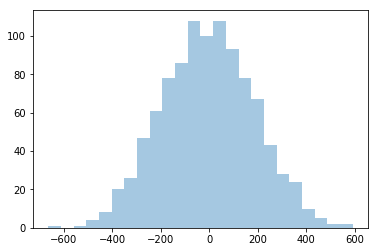

In [18]:
sns.distplot(pm, kde=False)

평균 부채차이 1000은 거의 찾아보기 어렵기 때문에 유의하다고 할 수 있다.